<a href="https://colab.research.google.com/github/AriwodolaWuraola/Data-cleaning-python-/blob/main/Assignment_By_Ariwodola_Wuraola_Data_Cleaning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

In [50]:
#load the dataset

df = pd.read_csv('messy_data.csv')

In [51]:
#check my dataset

print(df.describe())




            TrnsnID       CusmrID       ProdtID        Qutity         Prize  \
count  10100.000000  10100.000000  10100.000000  10100.000000  10100.000000   
mean    5000.546634    503.805050   1049.607228      7.028119    102.397194   
std     2886.964892    289.143863     28.931014      7.207902     56.429556   
min        1.000000      1.000000   1000.000000     -5.000000      5.030000   
25%     2504.750000    255.000000   1024.000000      1.000000     54.095000   
50%     4998.500000    507.500000   1050.000000      7.000000    102.080000   
75%     7502.250000    759.000000   1074.000000     13.000000    151.647500   
max    10000.000000    999.000000   1099.000000     19.000000    199.980000   

           TtlSales     CusterAge  
count  10100.000000  10100.000000  
mean    2521.484192     44.456832  
std     1431.601571     32.037813  
min       20.460000    -10.000000  
25%     1288.860000     17.000000  
50%     2520.870000     45.000000  
75%     3755.747500     73.000000  


In [52]:
#9.Rename columns


df = df.rename(columns={
    'TrnsnID': 'TransactionID',
    'Data': 'Date',
    'CusmrID': 'CustomerID',
    'ProdtID': 'ProductID',
    'ProdtName': 'ProductName',
    'Qutity': 'Quantity',
    'Prize': 'Price',
    'TtlSales': 'TotalSales',
    'PaymentType': 'PaymentType',
    'CusterAge': 'CustomerAge'})

In [53]:
# Print the DataFrame to verify column names


print(df.head())

   TransactionID        Date  CustomerID  ProductID ProductName  Quantity  \
0           7402  03/17/2026         991       1045       Boo E         9   
1           5835  26-01-2035         741       1040      Book J        18   
2           2123  05/26/2035         933       1062       Bok N         5   
3           8789  28-02-2036         641       1060      Book I         6   
4            305  19-04-2023         123       1058      Book B        15   

    Price  TotalSales PaymentType  CustomerAge  
0  167.72     2935.06         NaN           87  
1  193.27     4386.52  debit card           69  
2  126.39     1948.46        Cash           15  
3   66.98     1757.26        Cash           22  
4   33.63     2578.19        Cash           -1  


In [54]:
#1. Duplicate Records


df.drop_duplicates(inplace=True)

In [55]:
#check my dataset

print(df.head())


   TransactionID        Date  CustomerID  ProductID ProductName  Quantity  \
0           7402  03/17/2026         991       1045       Boo E         9   
1           5835  26-01-2035         741       1040      Book J        18   
2           2123  05/26/2035         933       1062       Bok N         5   
3           8789  28-02-2036         641       1060      Book I         6   
4            305  19-04-2023         123       1058      Book B        15   

    Price  TotalSales PaymentType  CustomerAge  
0  167.72     2935.06         NaN           87  
1  193.27     4386.52  debit card           69  
2  126.39     1948.46        Cash           15  
3   66.98     1757.26        Cash           22  
4   33.63     2578.19        Cash           -1  


In [56]:
#2.Check for Missing Values


print(df.isnull().sum())

TransactionID       0
Date                0
CustomerID          0
ProductID           0
ProductName       994
Quantity            0
Price               0
TotalSales          0
PaymentType      1439
CustomerAge         0
dtype: int64


In [58]:
#Impute missing categorical values with the mode (most common product name)


most_common_product = df['ProductName'].mode()[0]
df['ProductName'].fillna(most_common_product,inplace=True)

In [59]:
#Impute missing categorical values with the mode (most common value)


most_common_payment = df['PaymentType'].mode()[0]
df['PaymentType'].fillna(most_common_payment,inplace=True)

In [60]:
#re-check for Missing Values


print(df.isnull().sum())

TransactionID    0
Date             0
CustomerID       0
ProductID        0
ProductName      0
Quantity         0
Price            0
TotalSales       0
PaymentType      0
CustomerAge      0
dtype: int64


In [61]:
#3.Ensure Consistent Date Format


df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-61-cbfdf8983b66>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [63]:
#3.Ensure consistent date format.
#Convert 'Date' column to datetime with specified format


df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [64]:
#check the DataFrame to verify changes
print(df.head())

   TransactionID       Date  CustomerID  ProductID ProductName  Quantity  \
0           7402 2026-03-17         991       1045       Boo E         9   
1           5835 2035-01-26         741       1040      Book J        18   
2           2123 2035-05-26         933       1062       Bok N         5   
3           8789 2036-02-28         641       1060      Book I         6   
4            305 2023-04-19         123       1058      Book B        15   

    Price  TotalSales PaymentType  CustomerAge  
0  167.72     2935.06       Debit           87  
1  193.27     4386.52  debit card           69  
2  126.39     1948.46        Cash           15  
3   66.98     1757.26        Cash           22  
4   33.63     2578.19        Cash           -1  


In [71]:
#4.Standardize Payment Type Names


df['PaymentType'] = df['PaymentType'].replace({'Debit': 'Debit Card',
                                               'Credit': 'Credit Card',
                                               'Cash': 'Cash',
                                               'paypal': 'Paypal'})


In [72]:
#check dataframe to verify changes

print(df.head())



   TransactionID       Date  CustomerID  ProductID ProductName  Quantity  \
0           7402 2026-03-17         991       1045       Boo E         9   
1           5835 2035-01-26         741       1040      Book J        18   
2           2123 2035-05-26         933       1062       Bok N         5   
3           8789 2036-02-28         641       1060      Book I         6   
4            305 2023-04-19         123       1058      Book B        15   

    Price  TotalSales PaymentType  CustomerAge  
0  167.72     2935.06  Debit Card           87  
1  193.27     4386.52  debit card           69  
2  126.39     1948.46        Cash           15  
3   66.98     1757.26        Cash           22  
4   33.63     2578.19        Cash           -1  


In [85]:
#5.Check for negative values
#check for negative values in 'Price' column


negative_price = df[df['Price'] < 0]


if negative_price.empty:
    print("No negative values found in 'Price' column.")
else:
    print("Negative values found in 'Price' column:")
    print(negative_price)

No negative values found in 'Price' column.


In [77]:
#check for negative values in 'Quantity' column


negative_Quantity = df[df['Quantity'] < 0]


if negative_Quantity.empty:
    print("No negative values found in 'Quantity' column.")
else:
    print("Negative values found in 'Quantity' column:")
    print(negative_Quantity)

Negative values found in 'Quantity' column:
       TransactionID       Date  CustomerID  ProductID ProductName  Quantity  \
26              4302 2029-12-10         566       1022       Bok N        -4   
35              4429 2036-03-28         295       1057       Boo E        -4   
47              2376 2023-12-17         243       1075      Book R        -2   
50               316 2028-02-14         566       1012     Bookk H        -1   
51              8616 2031-06-01         897       1004      Book M        -3   
...              ...        ...         ...        ...         ...       ...   
10075           7850 2034-12-25         678       1005      Book S        -5   
10088            770 2036-05-30         835       1072      Book R        -5   
10093            467 2032-05-06         564       1095       Boo E        -3   
10094           6266 2034-01-06         804       1051       Boo E        -2   
10096           5192 2025-08-16         334       1093       Bok N        -2

In [79]:
import numpy as np

In [106]:
# Replace negative values in 'Quantity' column with 1


df.loc[df['Quantity'] < 0, 'Quantity'] = 1 #Definitely customers bought at least 1 item hence why i changed the negative values in 'Quantity' column to 1

In [82]:
# Check for negative values in 'TotalSales' column


negative_sales = df[df['TotalSales'] < 0]

# Check if there are any negative values in 'TotalSales'
if negative_sales.empty:
    print("No negative values found in 'TotalSales' column.")
else:
    print("Negative values found in 'TotalSales' column:")
    print(negative_sales)

No negative values found in 'TotalSales' column.


In [83]:
# Check for negative values in 'CustomerAge' column


negative_age = df[df['CustomerAge'] < 0]

# Check if there are any negative values in 'CustomerAge'
if negative_age.empty:
    print("No negative values found in 'CustomerAge' column.")
else:
    print("Negative values found in 'CustomerAge' column:")
    print(negative_age)

Negative values found in 'CustomerAge' column:
       TransactionID       Date  CustomerID  ProductID ProductName  Quantity  \
4                305 2023-04-19         123       1058      Book B      15.0   
6               2996 2031-04-03         571       1086      Book D      15.0   
30              4443 2026-01-09         294       1088      Book P       6.0   
32              4534 2030-10-23         963       1052      Book L       3.0   
47              2376 2023-12-17         243       1075      Book R       NaN   
...              ...        ...         ...        ...         ...       ...   
10065           7735 2026-10-11         620       1029       Bok N       NaN   
10068           3006 2025-01-23         261       1011      Book I      15.0   
10075           7850 2034-12-25         678       1005      Book S       NaN   
10080           3386 2024-04-01         875       1036       Boo E      15.0   
10098            861 2034-04-08         579       1014       Bok N      1

In [107]:
# Replace negative values in 'customerAge' column with 40


df.loc[df['CustomerAge'] < 0, 'CustomerAge'] = 40 #customers age should range between age 18 to 80 hence the reason why i changed the negative values to 40.

In [88]:
#6.check for outliers

import matplotlib.pyplot as plt

(array([1, 2, 3, 4]),
 [Text(1, 0, 'TotalSales'),
  Text(2, 0, 'Price'),
  Text(3, 0, 'Quantity'),
  Text(4, 0, 'CustomerAge')])

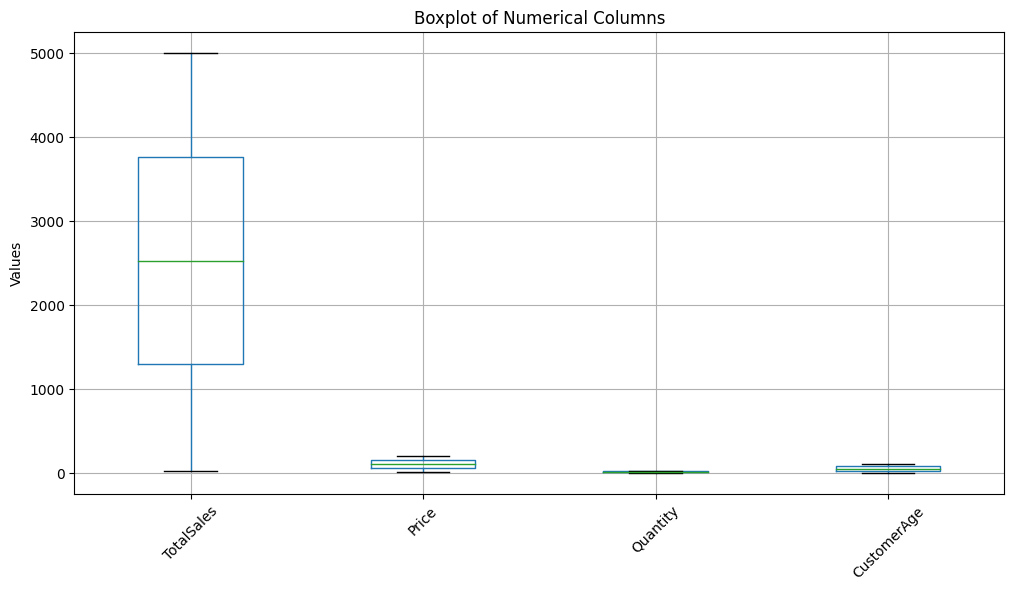

In [89]:
# Define numerical columns to check for outliers

numerical_columns = ['TotalSales', 'Price', 'Quantity', 'CustomerAge']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)

In [93]:
#7. Typos and textual errors

# Define corrections for typos in product names
corrections = {
    'Bok N': 'Book N',
    'Boo E': 'Book E',
    'Bookk H': 'Book H'
}

# Replace typos in 'ProductName' column
df['ProductName'] = df['ProductName'].replace(corrections)

# Print unique values in 'ProductName' column to verify corrections
print("Unique product names after corrections:")
print(df['ProductName'].unique())

Unique product names after corrections:
['Book E' 'Book J' 'Book N' 'Book I' 'Book B' 'Book D' 'Book P' 'Book M'
 'Book O' 'Book T' 'Book A' 'Book G' 'Book R' 'Book L' 'Book K' 'Book F'
 'Book H' 'Book S']


In [95]:
#8. Check current data types of each column
print("Current data types:")
print(df.dtypes)





Current data types:
TransactionID             int64
Date             datetime64[ns]
CustomerID                int64
ProductID                 int64
ProductName              object
Quantity                float64
Price                   float64
TotalSales              float64
PaymentType              object
CustomerAge             float64
dtype: object


In [96]:
# Convert 'Quantity' column to integers (i already replaced negative values with NaN)
df['Quantity'] = df['Quantity'].astype(float).astype('Int64')



In [97]:
# Verify the updated data type
print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
TransactionID             int64
Date             datetime64[ns]
CustomerID                int64
ProductID                 int64
ProductName              object
Quantity                  Int64
Price                   float64
TotalSales              float64
PaymentType              object
CustomerAge             float64
dtype: object


In [103]:
#Convert columns to the appropriate data types
#For columns not involved in calculations, convert to integers or strings
df['TransactionID'] = df['TransactionID'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df['CustomerID'] = df['CustomerID'].astype(int)
df['ProductID'] = df['ProductID'].astype(int)
df['ProductName'] = df['ProductName'].astype(str)  # Convert 'ProductName' to string
df['Quantity'] = df['Quantity'].astype('Int64')
df['Price'] = df['Price'].astype(float)  # Convert 'Price' to float
df['TotalSales'] = df['TotalSales'].astype(float)  # Convert 'TotalSales' to float
df['PaymentType'] = df['PaymentType'].astype(str)  # Convert 'PaymentType' to string
df['CustomerAge'] = df['CustomerAge'].astype(float).astype('Int64')

In [104]:
# Verify the updated data types

print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
TransactionID             int64
Date             datetime64[ns]
CustomerID                int64
ProductID                 int64
ProductName              object
Quantity                  Int64
Price                   float64
TotalSales              float64
PaymentType              object
CustomerAge               Int64
dtype: object
